In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint

data_train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [17]:
data_train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [18]:
data_test.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [19]:
# DataFrame to matrix
data_train = data_train.values
data_test = data_test.values

In [20]:
# Values and Target
X_train, y_train = data_train[:,1:], data_train[:,0]
X_test, y_test = data_test[:,1:], data_test[:,0]

In [21]:
# Normalize Pixel Values
X_train = X_train / 255
X_test = X_test / 255

In [22]:
# One hot
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [40]:
class LogisticRegressionModel:
    """
        Fit model with batch and epoch
    """
    def __init__(self, batch_size=100, learning_rate = 0.01, epochs = 10):
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        
        self.X = tf.placeholder(tf.float32, [None, 784])
        self.Y = tf.placeholder(tf.float32, [None, 10])
        
        self.W = tf.Variable(tf.zeros([784, 10]))
        self.b = tf.Variable(tf.zeros([10]))
        
        # Construct model
        self.pred = tf.nn.softmax( tf.add(tf.matmul(self.X, self.W), self.b) )

        # Minimize error using cross entropy
        self.cost = tf.reduce_mean(-tf.reduce_sum(self.Y*tf.log(self.pred), reduction_indices=1))
        self.optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(self.cost)
        self.init = tf.global_variables_initializer()
    
    def fit_and_predict(self, X_train, y_train, X_test, y_test):
        cost_history, accuracy_history = [], []
        with tf.Session() as sess:
            sess.run(self.init)
            for epoch in range(self.epochs):
                avg_cost = 0
                avg_acc = 0
                total = X_train.shape[0] / self.batch_size
                for i in range(0, X_train.shape[0], self.batch_size):
                    opt, c = sess.run([self.optimizer, self.cost], 
                                    feed_dict={self.X: X_train[i:i+self.batch_size], 
                                               self.Y: y_train[i:i+self.batch_size]})
                    
                    avg_cost += c / total
                    correct_prediction = tf.equal(tf.argmax(self.pred, 1), 
                                                  tf.argmax(self.Y, 1)) 
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32))
                    j = randint(0, X_test.shape[0] - 1)
                    accuracy = accuracy.eval({self.X: X_test[j:j+self.batch_size],
                                              self.Y: y_test[j:j+self.batch_size]
                                             })
                    avg_acc += accuracy / total
                cost_history.append(avg_cost)
                accuracy_history.append(avg_acc)
                print(f"Epoch: {epoch}; Accuracy: {avg_acc}; Cost: {avg_cost}")
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,8), sharey=True, sharex=True)
        data = [accuracy_history, cost_history]
        for i, name in enumerate(('Accuracy', 'Cost')):
            
            ax[i].scatter(x=range(len(data[i])), y=data[i])
            ax[i].set_title(name + ' History')
            ax[i].set_ylabel(name)
            ax[i].set_xlabel('Epoch')

Epoch: 0; Accuracy: 0.5146495401859283
Epoch: 1; Accuracy: 0.6360159416993459
Epoch: 2; Accuracy: 0.6534304867188135
Epoch: 3; Accuracy: 0.6542248825232188
Epoch: 4; Accuracy: 0.660932684938113
Epoch: 5; Accuracy: 0.652448187271754
Epoch: 6; Accuracy: 0.6570398757855097
Epoch: 7; Accuracy: 0.6588055888811747
Epoch: 8; Accuracy: 0.6580581714709599
Epoch: 9; Accuracy: 0.6653389434019724


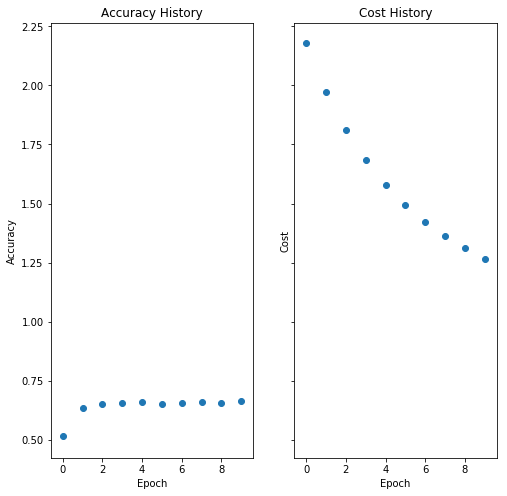

In [41]:
lg_model = LogisticRegressionModel( batch_size=5000)
lg_model.fit_and_predict(X_train, y_train, X_test, y_test)

In [79]:
# Полносвязанная нейросеть Fully Connected Feed-Forward Neural Network
class FNN:

    def __init__(self, settings = [{'size': 256, 'activation': 'relu', 'input_shape': (784,)},
                                   {'size': 128, 'activation': 'relu'},
                                   {'size': 128, 'activation': 'relu'},
                                   {'size': 10, 'activation': 'softmax'}] ):
        self.model = tf.keras.models.Sequential()
        # First layer
        self.model.add(tf.keras.layers.Dense(settings[0].get('size', 256),
                                             activation=settings[0].get('activation', 'relu'),
                                             input_shape=settings[0].get('input_shape', (784,)))
                      )
        
        for setting in settings[1:-1]:
            self.model.add(tf.keras.layers.Dense(setting.get('size'),
                                                 activation=setting.get('activation', 'relu'))
                          )
        
        # Last layer
        self.model.add(tf.keras.layers.Dense(settings[-1].get('size', 10),
                                             activation=settings[-1].get('activation', 'softmax'))
                      )
    
    def compile(self, loss='categorical_crossentropy', optimizer='adadelta', 
                      metrics=['accuracy']):
        self.model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def evaluate(self, X_test, y_test):
        _, score = self.model.evaluate(X_test, y_test, verbose=0)
        return score

In [80]:
fnn_model = FNN()
fnn_model.compile()
fnn_model.fit(X_train, y_train)

60000/60000 [==============================] - 10s 166us/sample - loss: 0.5066 - acc: 0.8131


In [82]:
score = fnn_model.evaluate(X_test, y_test)

In [54]:
# Сверточная нейронная сеть CNN
class CNN:
    def __init__(self, input_shape=(28, 28, 1)):
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Flatten())
        self.model.add(tf.keras.layers.Dense(64, activation='relu'))
        self.model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    def compile(self):
        self.model.compile(loss='categorical_crossentropy', 
                           optimizer= 'adadelta', 
                           metrics=['accuracy'])
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    
    def eval(self, X_test, y_test):
        _, score = self.model.evaluate(X_test, y_test, verbose=0)
        return score

In [57]:
x_train = X_train.reshape(60000, 28, 28, 1)
x_test = X_test.reshape(10000, 28, 28, 1)

cnn_model = CNN()
cnn_model.compile()
cnn_model.fit(x_train, y_train)
sc = cnn_model.eval(x_test, y_test)

60000/60000 [==============================] - 28s 471us/sample - loss: 0.4707 - acc: 0.8295


In [58]:
sc

0.8819

In [69]:
class CNN1(CNN):
    #Add new layer
    def __init__(self, input_shape=(28, 28, 1)):
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Flatten())
        self.model.add(tf.keras.layers.Dense(64, activation='relu'))
        self.model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [70]:
cnn_model1 = CNN1()
cnn_model1.compile()
cnn_model1.fit(x_train, y_train)
sc1 = cnn_model1.eval(x_test, y_test)

60000/60000 [==============================] - 32s 528us/sample - loss: 0.5886 - acc: 0.7817


In [71]:
sc1

0.838

In [76]:
class CNN2(CNN):
    #Add Batch Normalization
    def __init__(self, input_shape=(28, 28, 1)):
        self.model = tf.keras.models.Sequential()
        self.model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
        self.model.add(tf.keras.layers.MaxPooling2D((2,2)))
        self.model.add(tf.keras.layers.Flatten())
        self.model.add(tf.keras.layers.Dense(64, activation='relu'))
        self.model.add(tf.keras.layers.BatchNormalization())
        self.model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [77]:
cnn_model2 = CNN2()
cnn_model2.compile()
cnn_model2.fit(x_train, y_train)
sc2 = cnn_model2.eval(x_test, y_test)

60000/60000 [==============================] - 30s 506us/sample - loss: 0.4123 - acc: 0.8516


In [78]:
sc2

0.8789

In [84]:
f"""
Резюме

Качество логистической модели видно на графике
С кол-вом эпох растет точность предсказания

FNN модель
Качество: {score}

CNN модель
Качество: {sc}

СNN модель с добавлением нового слоя
Качество: {sc1}

СNN модель с добавлением Batch слоя
Качество: {sc2}

Видно, что СNN модель с добавление Batch слоя имеет наибольшую точность предсказания

СNN модель с добавлением нового слоя  имеет точность предсказания выше, чем и обычной СNN
Это просходит, так как мы добавили еще одно "взвешивание" весов, поэтому их обновление лучше, 
что и дает такой результат

"""

'\nРезюме\n\nКачество логистической модели видно на графике\nС кол-вом эпох растет точность предсказания\n\nFNN модель\nКачество: 0.8629000186920166\n\nCNN модель\nКачество: 0.8357999920845032\n\nСNN модель с добавлением нового слоя\nКачество: 0.8379999995231628\n\nСNN модель с добавлением Batch слоя\nКачество: 0.8788999915122986\n\nВидно, что СNN модель с добавление Batch слоя имеет наибольшую точность предсказания\n\nСNN модель с добавлением нового слоя  имеет точность предсказания выше, чем и обычной СNN\nЭто просходит, так как мы добавили еще одно "взвешивание" весов, поэтому их обновление лучше, \nчто и дает такой результат\n\n'